# Knapsack 0/1 (Genetic Algorithm) 

In [1]:
from Genetic_Algorithm import *

In [2]:
POPULATION_SIZE = 200  # Kích thước quần thể
GENERATIONS = 200  # Số thế hệ
CROSSOVER_RATE = 0.8  # Tỷ lệ lai ghép
MUTATION_RATE = 0.04  # Tỷ lệ đột biến

---

<h3>I. Input Problem</h3>

---

In [3]:
def read_file(file_name):
    items = []  
    max_capacity = 0 
    with open(file_name, 'r') as f:
        lines = f.readlines()
        weights_line = lines[0].strip()
        weights = list(map(int, weights_line[weights_line.index('[')+1:weights_line.index(']')].split(',')))
        values_line = lines[1].strip()
        values = list(map(int, values_line[values_line.index('[')+1:values_line.index(']')].split(',')))
        items = list(zip(weights, values))
        max_capacity_line = lines[2].strip()
        max_capacity = int(max_capacity_line.split('=')[1].strip())  
    return items, max_capacity

In [4]:
items, max_capacity = read_file(r"D:/_Dev/Python/Knapsack-Problem-Genetic-Algorithm/Testcase/t5.txt")

In [5]:
def fitness(individual):
    total_weight = sum(individual[i] * items[i][0] for i in range(len(items)))
    total_value = sum(individual[i] * items[i][1] for i in range(len(items)))
    return total_value if total_weight <= max_capacity else 0

In [6]:
def initialize_population(num_items):
    return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(POPULATION_SIZE)]

In [7]:
def select_population(population):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:POPULATION_SIZE]

In [8]:
def crossover(parent1, parent2):
    child1, child2 = parent1[:], parent2[:]
    for i in range(len(parent1)):
        coin_flip = random.choice([0, 1])
        if coin_flip == 0:
            child1[i] = parent1[i]
            child2[i] = parent2[i]
        else:
            child1[i] = parent2[i]
            child2[i] = parent1[i]
    return child1, child2  

In [9]:
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]
    return individual

In [10]:
def genetic_algorithm():
    global fitness_history
    
    population = initialize_population(len(items))
    best_individual = max(population, key=lambda ind: fitness(ind))

    for gen in range(GENERATIONS):
        selected_population = select_population(population)
        
        num_to_crossover = int(POPULATION_SIZE * CROSSOVER_RATE)
        selected_for_crossover = selected_population[:num_to_crossover]
        
        offspring = []
        for i in range(0, num_to_crossover, 2):
            if i + 1 < len(selected_for_crossover):
                child1, child2 = crossover(selected_for_crossover[i], selected_for_crossover[i + 1])
                offspring.extend([child1, child2])
        
        offspring = [mutate(ind) for ind in offspring]
        
        # Cắt tỉa quần thể để đảm bảo kích thước không vượt quá POPULATION_SIZE
        population.extend(offspring)
        population = sorted(population, key=lambda ind: fitness(ind), reverse=True)
        population = population[:POPULATION_SIZE]
        
        current_best = max(population, key=lambda ind: fitness(ind))
        fitness_history.append(fitness(current_best))
        
        if fitness(current_best) > fitness(best_individual):
            best_individual = current_best

    return best_individual, fitness(best_individual)

--- 

<h3>II. Solution</h3>

---

In [11]:
best_solution, best_value = genetic_algorithm()
print("Best solution:", best_solution)
print("Best value:", best_value)

Best solution: [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]
Best value: 79009


---

<h3>III. Biểu diễn biểu đồ hội tụ qua các thế hệ</h3>

---

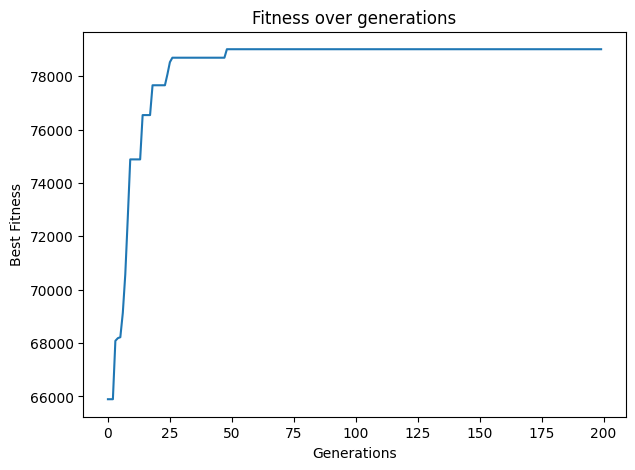

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(fitness_history)
plt.title('Fitness over generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()